In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


In [1]:
data.describe()

NameError: name 'data' is not defined

In [4]:
row_count = len(data)
print(f'Analysing {row_count} rows of data')

diabetic_count = data['Diabetic'].value_counts()
print(f'Diabetic count: {diabetic_count}')

Analysing 10000 rows of data
Diabetic count: Diabetic
0    6656
1    3344
Name: count, dtype: int64


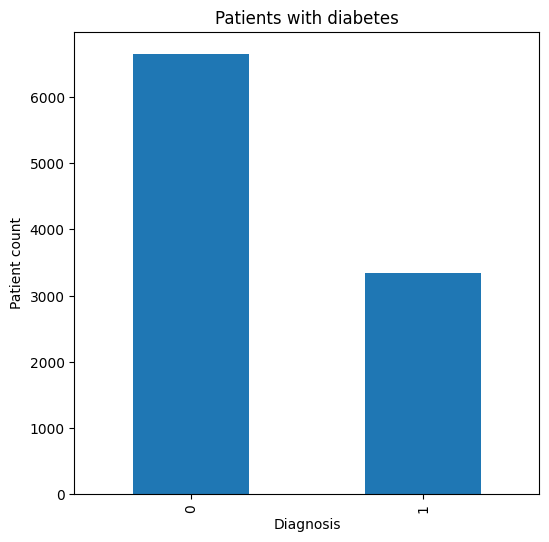

Figure saved


In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
diabetic_count.plot.bar(ax=ax)
ax.set_title('Patients with diabetes')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Patient count')
plt.show()
fig.savefig('Diabetic.png')
plt.close(fig)
print('Figure saved')

In [9]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
import sklearn
sklearn.__version__

'1.6.1'

In [11]:
data

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


In [12]:
data.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

#### Separate features from the label

In [70]:
X, y = data[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 
            'DiabetesPedigree', 'Age']].values, data['Diabetic'].values

In [22]:
len(X)

10000

In [23]:
len(y)

10000

#### Split the data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(len(X_train))
print(len(X_test))

7000
3000


#### Train the Model

In [72]:
reg = 0.1
model = LogisticRegression(C=1/reg, max_iter=200)
model

LogisticRegression(C=10.0, max_iter=200)

In [73]:
model.fit(X_train, y_train)
model

LogisticRegression(C=10.0, max_iter=200)

In [74]:
predictions = model.predict(X_test)
acc1 = np.average(predictions == y_test)
acc1

0.785

In [75]:
print(confusion_matrix(y_test, predictions))

[[1752  222]
 [ 423  603]]


In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1974
           1       0.73      0.59      0.65      1026

    accuracy                           0.79      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.78      0.79      0.78      3000



#### Predictions on the test data

In [50]:
predictions = model.predict(X_test)
acc1 = np.average(predictions == y_test)
acc1

0.7566666666666667

In [51]:
acc2 = np.average(y_test == predictions)
acc2

0.7566666666666667

#### Use different Learning rates

In [63]:
reg = [1, 5, 10, 20, 30]
models = [LogisticRegression(C=1/ele, max_iter=500) for ele in reg]
len(models)

5

In [64]:
for index,model in enumerate(models):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = np.average(predictions == y_test)
    print(f'Reg rate: {reg[index]}, Accuracy: {acc}')

print('Done')    

Reg rate: 1, Accuracy: 0.7566666666666667
Reg rate: 5, Accuracy: 0.756
Reg rate: 10, Accuracy: 0.757
Reg rate: 20, Accuracy: 0.757
Reg rate: 30, Accuracy: 0.7583333333333333
Done


#### Inference

In [103]:
X_new = [[1,200,83,27,195,37.89166881,0.865807302,22],
         [0,104,62,54,593,40.49619978,0.548990862,21]]

predictions = model.predict(X_new)

classnames = ['Non-Diabetic', 'Diabetic']

for prediction in predictions:
    print(classnames[prediction])

Non-Diabetic
Diabetic


#### Titatic data

In [104]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


#### Convert non-numeric column to numeric

In [106]:
def converter(sex):
    if sex == 'female':
        return 0
    elif sex == 'male':
        return 1

In [107]:
titanic_data['Gender'] = titanic_data['Sex'].apply(converter)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,NaN,1,2,23.4500,0
889,1,1,male,26.0,0,0,30.0000,1


In [109]:
titanic_data.drop('Sex', axis=1, inplace=True)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,NaN,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [111]:
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,NaN,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [114]:
titanic_data['Age'].fillna(value=titanic_data['Age'].mean(), inplace=True)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [115]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [117]:
X,y = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']].values, titanic_data['Survived'].values
len(X)

891

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [119]:
titanic_model = LogisticRegression()
titanic_model

LogisticRegression()

In [120]:
titanic_model.fit(X_train, y_train)
titanic_model

LogisticRegression()

In [125]:
predictions = titanic_model.predict(X_test)
acc = np.average(predictions == y_test)
acc

0.7723880597014925

In [139]:
# ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']

prediction = titanic_model.predict([[3,30,0,2,75,0]])
prediction[0]

1

In [127]:
print(confusion_matrix(y_test, predictions))

[[133  21]
 [ 40  74]]


In [128]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

